In [1]:
import pandas as pd
import matplotlib.pyplot as plt ## seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns           ## seaborn은 matplotlib보다 간단하게 사용 가능
col_names = [ 'season', 'holiday', 'workingday', 'weather'  ]
i = 0
plt.figure(figsize=(12,10))   # 전체 그래프의 크기 지정 


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [3]:
train = pd.read_csv("train.csv", parse_dates=['datetime'])
test = pd.read_csv("test.csv", parse_dates=['datetime'])
sub = pd.read_csv("sampleSubmission.csv", parse_dates=['datetime'])

In [5]:
import matplotlib.pyplot as plt ## seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns 


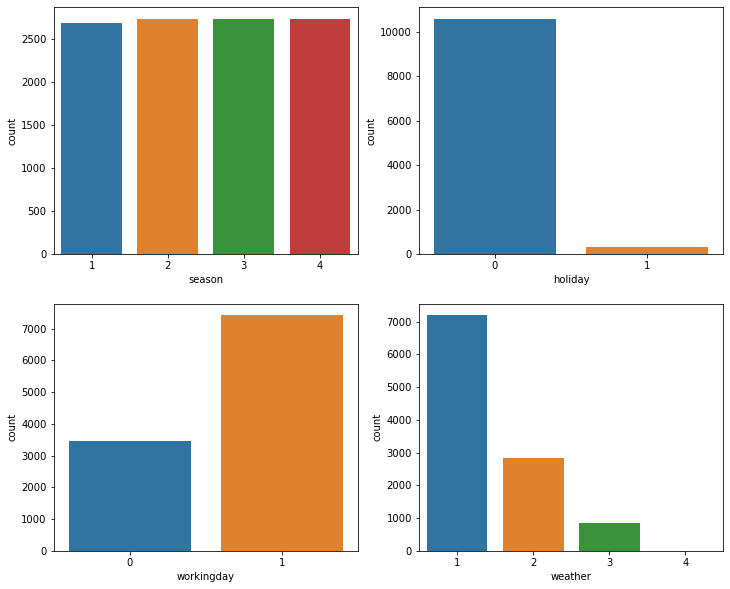

In [6]:
col_names = [ 'season', 'holiday', 'workingday', 'weather'  ]
i = 0
plt.figure(figsize=(12,10))   # 전체 그래프의 크기 지정 

for name in col_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회 
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(2,2,i)        # 2행 2열에 i번째 그래프 선택
    sns.countplot(name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    
plt.show()

In [7]:
num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

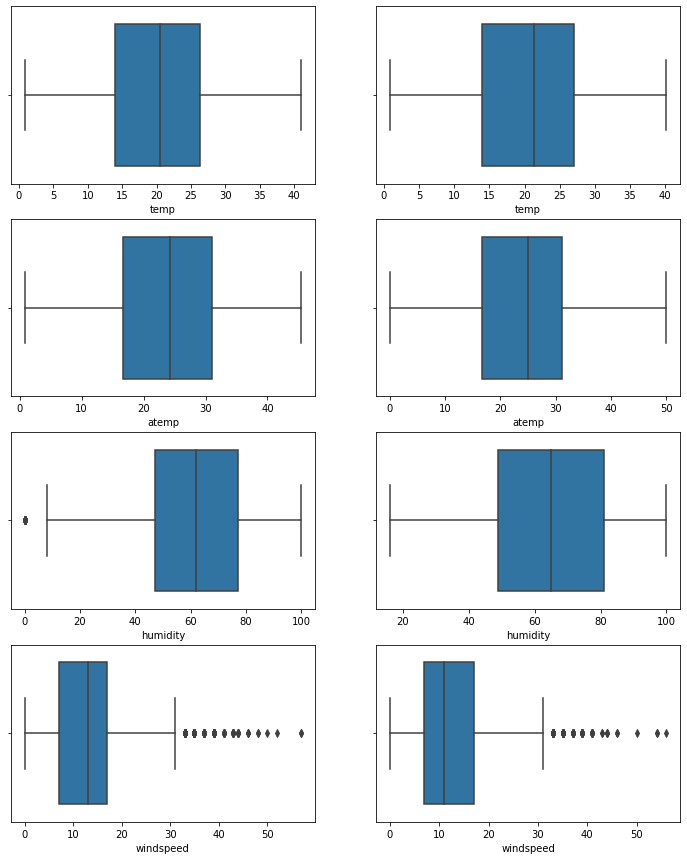

In [8]:
i = 0
plt.figure(figsize=(12,15))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    plt.subplot(4,2,i*2)        # 2행 2열에 i번째 그래프 선택
    sns.boxplot(name, data=test)  # i번째 그래프에 sns.countplot를 그리겠다.
    
plt.show() 

In [9]:
new_tr = train.copy()   # 데이터 백업
new_test = test.copy()
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [10]:
new_tr['year'] = new_tr['datetime'].dt.year
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011


In [11]:
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [12]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

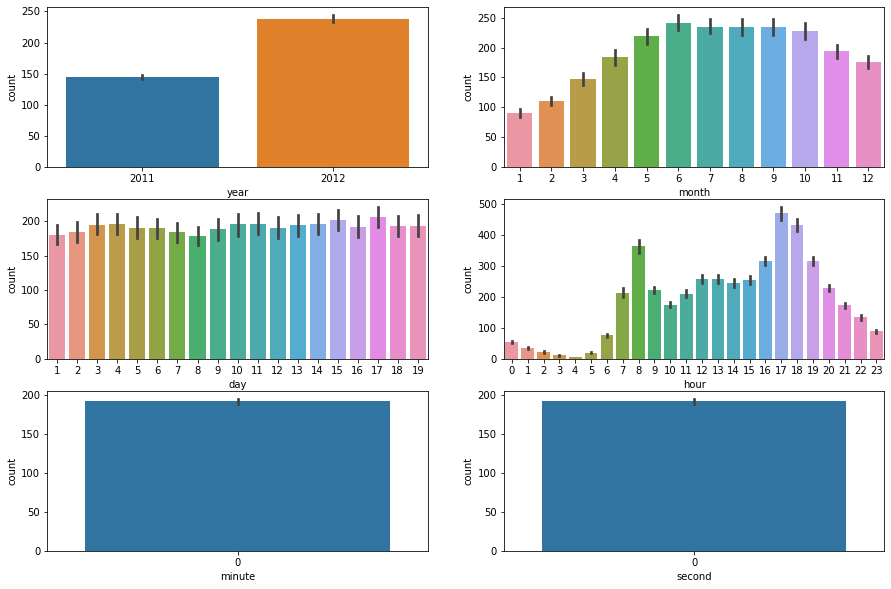

In [13]:
datetime_names = ['year', 'month', 'day', 'hour', 'minute', 'second']

i=0
plt.figure(figsize=(15,10))
for name in datetime_names:
    i = i + 1
    plt.subplot(3,2,i)
    sns.barplot(x=name, y='count', data=new_tr)
    
plt.show()

### 확인
* 2011년, 2012년이 더 많다. (성장했는가?)
* 여름이 많다.
* day는 고른 분포를 보인다.
* hour는 8시, 17,18시대에 많다. (새벽 시간대도 있구나... 음.)
* minute, second는 0 데이터 의미가 없음.
* day 1~19 일... 20일이 없네요.(test)

In [14]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second

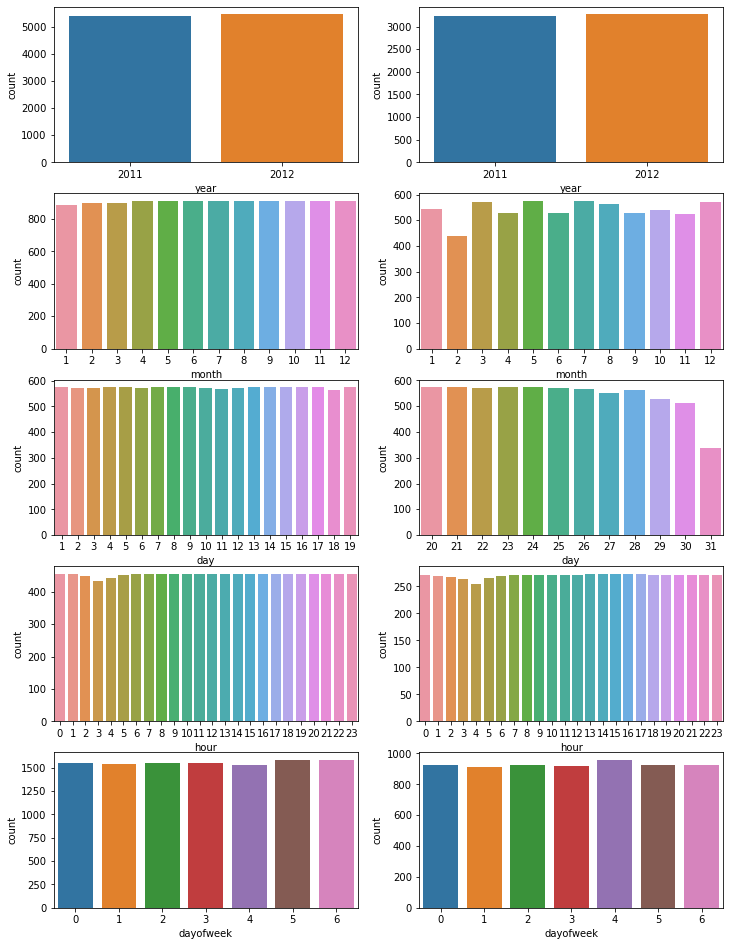

In [15]:
col_names = ['year','month','day','hour','dayofweek']
i = 0

plt.figure(figsize=(12,20))  ##전체 그래프 크기 지정

for name in col_names: ## 컬럼명으로 반복
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(name, data = new_tr)
  
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(name, data = new_test)
  
plt.show()

In [16]:
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek  # Monday=0, Sunday=6

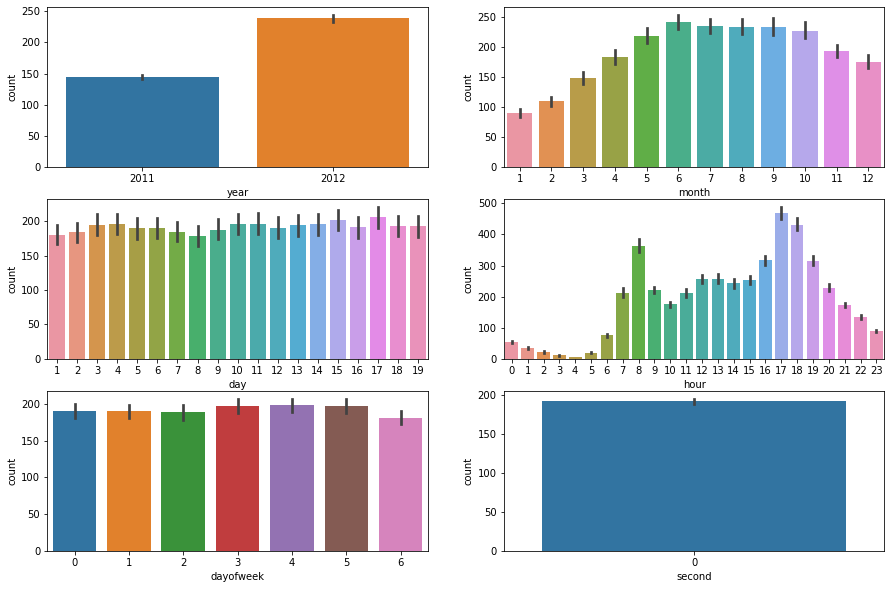

In [17]:
datetime_names = ['year', 'month', 'day', 'hour', 'dayofweek', 'second']

i=0
plt.figure(figsize=(15,10))
for name in datetime_names:
    i = i + 1
    plt.subplot(3,2,i)
    sns.barplot(x=name, y='count', data=new_tr)
    
plt.show()

In [18]:
print(new_test.shape)
new_test[["datetime", "year", "month", "day", "hour", "minute", "second", "dayofweek"]].head()

(6493, 16)


,datetime,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


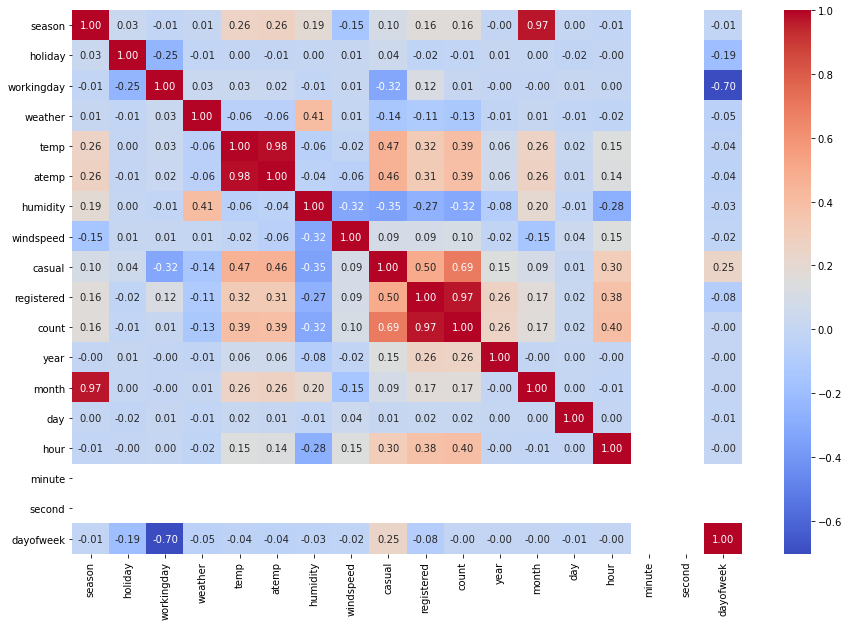

In [19]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [20]:
print(new_tr.columns)
print(new_test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek',
       'hour', 'minute', 'second'],
      dtype='object')


In [21]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "hour", "dayofweek"]  # 공통 변수

X_train = new_tr[feature_names]  # 학습용 데이터 변수 선택
X_test = new_test[feature_names]    # 테스트 데이터의 변수 선택 
print(X_train.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  hour  dayofweek  
0  2011     0          5  
1  2011     1          5  
2  2011     2          5  
3  2011     3          5  
4  2011     4          5  


In [22]:
label_name = 'count'                # 렌탈 대수 (종속변수)
y_train = new_tr[label_name]        # 렌탈 대수 변수 값 선택

### 1-4 모델 만들기 및 제출

### 모델 만들기 및 예측 순서
* 모델을 생성한다. model = 모델명()
* 모델을 학습한다. model.fit( 입력값, 출력값 )
* 모델을 이용하여 예측 model.predict(입력값)

In [23]:
from sklearn.linear_model import LinearRegression   # 선형회귀
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)   # 예측(새로운 데이터로)
predictions

array([-23.27179232, -20.84936197, -13.04580719, ..., 209.84495832,
       227.95174821, 217.86201958])

In [25]:
sub = pd.read_csv("sampleSubmission.csv")
sub['count'] = predictions
sub.head()

,datetime,count
0,2011-01-20 00:00:00,-23.271792
1,2011-01-20 01:00:00,-20.849362
2,2011-01-20 02:00:00,-13.045807
3,2011-01-20 03:00:00,-1.986454
4,2011-01-20 04:00:00,5.817101


### 음수에 대한 값처리
* count가 0이하의 경우에 대해서 'count'를 0으로 한다.

In [29]:
sub.loc[ sub['count'] < 0, 'count' ] = 0
sub.loc[ sub['count'] < 0, : ]

,datetime,count


In [30]:
# 처음 만는 제출용 csv 파일, 행번호를 없애기
sub.to_csv("1stsub.csv", index=False)

### 의사결정 트리모델 만들기

In [31]:
from sklearn.tree import DecisionTreeRegressor   

model = DecisionTreeRegressor()  # 모델 객체 생성.
model.fit(X_train, y_train)   
pred_2 = model.predict(X_test)   # 예측(새로운 데이터로)
pred_2

array([ 11.,   4.,   3., ...,  71., 106.,  46.])

(array([2618., 1330., 1015.,  661.,  338.,  266.,  121.,   68.,   56.,
          20.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

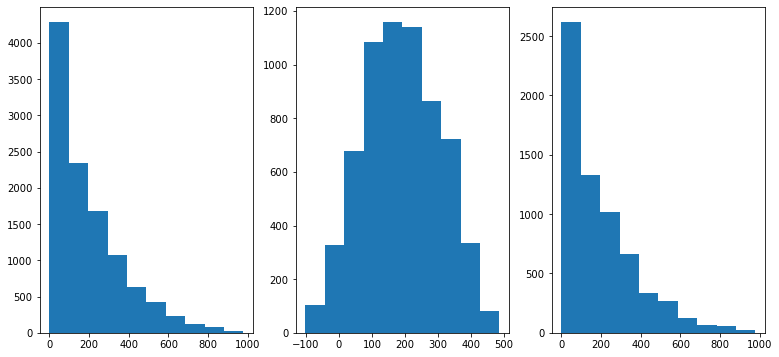

In [32]:
plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
plt.hist(new_tr['count'])      #  학습용 데이터 자전거 렌탈 대수
plt.subplot(1,3,2)
plt.hist(predictions) #  선형 회귀로 테스트 데이터 이용 예측한 대수
plt.subplot(1,3,3)
plt.hist(pred_2)     #  의사결정트리로 테스트 데이터 이용 예측한 대수

In [33]:
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)

In [34]:
seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)
predictions = model.predict(X_test)   # 예측(새로운 데이터로)
predictions

array([ 11.52      ,   4.58      ,   3.76      , ..., 102.1       ,
        99.91333333,  46.9       ])

In [36]:
sub = pd.read_csv("sampleSubmission.csv")
sub['count'] = predictions

In [37]:
# 처음 만는 제출용 csv 파일, 행번호를 없애기
sub.to_csv("rf_submission.csv", index=False)

### 그렇다면 어떤 모델이 나은지 어떻게 판단할 수 있는가?

### 1-5 모델 평가 및 제출
* 데이터 나누는 방법으로 기본으로 train_test_split 함수가 있음.
* 교차검증 반복 함수 cross_val_score
    * cross-validation에 의해 점수를 평가한다.
* cross_val_score(model, X, y, scoring=None, cv=None)
    * model : 회귀 분석 모형
    * X : 독립 변수 데이터
    * y : 종속 변수 데이터
    * scoring : 성능 검증에 사용할 함수 이름
    * cv : 교차검증 생성기 객체 또는 숫자.
    * None이면 KFold(3), 숫자 k이면 KFold(k)

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [40]:
import numpy as np

In [41]:
model_list = ["LinearRegression",  "DecisionTreeRegressor", "KNeighborsRegressor", "RandomForestRegressor",  "AdaBoostRegressor"]
model_score = []

선형회귀 01

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", np.abs(score.mean()))
m_score = np.abs(score.mean())  # 절대값
model_score.append(m_score)

[-10001.73269892 -14719.1205855  -13684.42876335 -33057.3894553
 -33971.64722717]
MSE 평균 : 21086.863746046223


### 의사결정트리 (DecisionTree)

In [43]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", np.abs(score.mean()))
m_score = np.abs(score.mean())  # 절대값
print(m_score)
model_score.append(m_score)

[-8056.06014692 -5467.47909968 -8483.86231052 -8642.50390446
 -8364.43396876]
MSE 평균 : 7802.867886068266
7802.867886068266


### 의사결정트리 KNN

In [44]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", np.abs(score.mean()))
m_score = np.abs(score.mean())  # 절대값
model_score.append(m_score)

[-15489.78091827 -19509.55790537 -12562.31961415 -24299.72957281
 -28798.93245751]
MSE 평균 : 20132.064093622575


### 앙상블 RandomForest

In [45]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())
m_score = np.abs(score.mean())  # 절대값
model_score.append(m_score)

[-7024.31665862 -2790.01941476 -6424.61353786 -4592.28358096
 -5719.81230882]
MSE 평균 : -5310.209100204522


앙상블 Ada

In [46]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, 
                        cv=5, scoring="neg_mean_squared_error")
print(score)
print("MSE 평균 :", score.mean())
m_score = np.abs(score.mean())  # 절대값
model_score.append(m_score)

[-21436.19892324  -9589.64468181 -14441.88449956 -13947.4900491
 -14089.42568564]
MSE 평균 : -14700.928767872037


In [47]:
import pandas as pd
dat = pd.DataFrame( {'model_name':model_list, 'score': model_score })
dat

,model_name,score
0,LinearRegression,21086.863746
1,DecisionTreeRegressor,7802.867886
2,KNeighborsRegressor,20132.064094
3,RandomForestRegressor,5310.209100
4,AdaBoostRegressor,14700.928768


<AxesSubplot:>

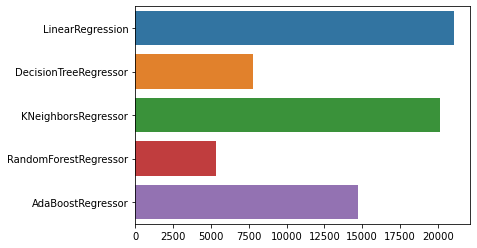

In [48]:
sns.barplot(x=model_score , y=model_list, data=dat)